# Figure 1

Pull in data from differential expression screen

In [1]:
cd ..

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [2]:
import NotebookImport
from DX_screen import *

/cellar/users/agross/anaconda2/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from /cellar/users/agross/anaconda2/lib/python2.7/site-packages/MethylTools/Probe_Annotations

Read in microarray validation data.

In [3]:
microarray = pd.read_hdf(MICROARRAY_STORE, 'data')
tissue = pd.read_hdf(MICROARRAY_STORE, 'tissue')

dx = microarray.xs('01',1,1) - microarray.xs('11',1,1)
tt = tissue[:,'01'].replace('COAD','COADREAD')
pos = (dx>0).groupby(tt, axis=1).sum() 
count = dx.groupby(tt, axis=1).count().replace(0, np.nan)
count = count[count.sum(1) > 500]
frac_df = 1.*pos / count
frac_microarray = frac_df.mean(1)

In [4]:
pts = ti(microarray.groupby(level=0, axis=1).size() > 1)

In [5]:
cc = microarray.columns
pts = list({p[0] for p in cc if (p[0], '01') in cc and (p[0], '11') in cc})

In [6]:
microarray.shape

(20383, 2904)

In [7]:
frac_microarray.name = 'GEO mean'
df = frac_df
df = df.join(frac_microarray).ix[dx_rna.frac.index].dropna(0, how='all')
df.to_csv(FIGDIR + 'geo.csv')

In [8]:
tt = tissue.groupby(lambda s: s[0].split('_')[0]).first()
cc = pd.DataFrame([(c.split('_')[0], c) for c in pts])[0].value_counts()
pd.concat([tt, cc], 1)

,0,1
GSE14520,LIHC,213
GSE25097,LIHC,243
GSE33532,NSCLC,20
GSE39004,BRCA,45
GSE39791,LIHC,72
GSE41258,COADREAD,46
GSE44076,COAD,98
GSE5364,PANCAN,71
GSE53757,KIRC,72
GSE62872,PRAD,160


In [9]:
match_series(frac_microarray.dropna(), dx_rna.frac.dropna())[0].shape

(16825,)

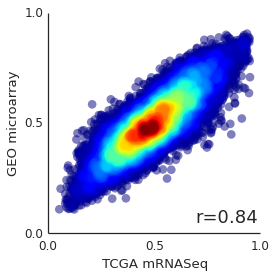

In [10]:
fig, ax = subplots(figsize=(4,4))
s1, s2 = match_series(dx_rna.frac, frac_microarray)
plot_regression(s1, s2, density=True, rad=.02, ax=ax, rasterized=True,
                line_args={'lw':0})
ax.set_ylabel("GEO microarray")
ax.set_xlabel("TCGA mRNASeq")
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_xticks([0, .5, 1])
ax.set_yticks([0, .5, 1])
fig.tight_layout()
fig.savefig(FIGDIR + 'geo_fup.png', dpi=300)

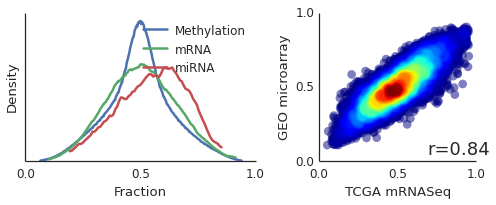

In [11]:
fig = plt.figure(figsize=(7, 3))
ax1 = plt.subplot2grid((1, 7), (0, 0), colspan=4)
ax2 = plt.subplot2grid((1, 7), (0, 4), colspan=3)
fig_1e(ax1)


ax=ax2
s1, s2 = match_series(dx_rna.frac, frac_microarray)
plot_regression(s1, s2, density=True, rad=.02, ax=ax, rasterized=True,
                line_args={'lw':0})
ax.set_ylabel("GEO microarray")
ax.set_xlabel("TCGA mRNASeq")
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_xticks([0, .5, 1])
ax.set_yticks([0, .5, 1])
fig.tight_layout()
fig.savefig(FIGDIR + 'dx_fig1.pdf', transparent=True)